In [13]:
import numpy as np
import scipy
import astropy
import sep
import matplotlib.pyplot as plt

In [30]:
from scipy import optimize 

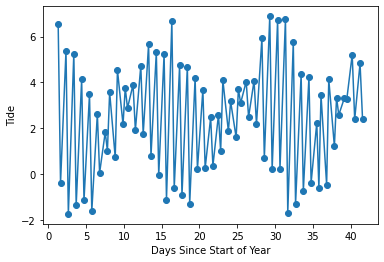

In [154]:
arr = np.loadtxt('ASTR19_S22_group_project_data.txt', skiprows=3, dtype='str')
def np_to_list(arr):
  nums = []
  for elem in arr:
    t1 = int(elem[0])
    t2 = elem[1]
    t3 = float(elem[2])
    nums.append((t1, t2, t3))
  return nums

data = np_to_list(arr)
x_col = []
y_col = []
#print(data)
for d in data:
  tide = d[2]
  day = d[0]
  time = d[1]
  #print(time)
  temp = time.split(':')
  new_time = int(temp[0])*60
  new_time += int(temp[1])
  new_time /= (24*60)
  x_col.append(day+new_time)
  y_col.append(tide)

#print(x_col)
#print(y_col)
X = np.array(x_col)
y = np.array(y_col)

plt.plot(X,y, marker='o')
plt.xlabel('Days Since Start of Year')
plt.ylabel('Tide')
plt.show()

### 

-575.3811945005092 576.2241992952083 4.388583053785001 2.493676967927122


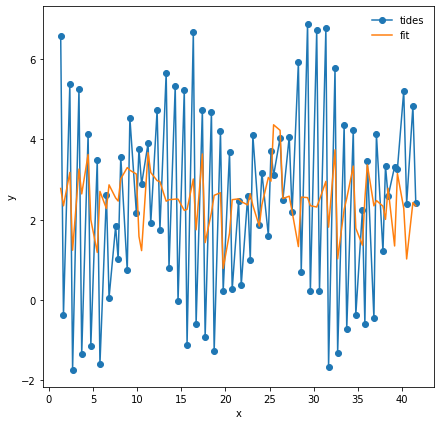

In [352]:
#define an oscillatory function
func = (np.sin(a*X)+np.sin(b*X))*np.sin(c*X) + d
sig = np.full(len(x_col),0.25)

#2 main oscillations within the whole oscillatory graph: larger one with a period of around 17 days and smaller one with around 10 days

#define the function to fit
 
def fit_line(X,a,b,c,d):
    return (np.sin(a*X)+np.sin(b*X))*np.sin(c*X) + d

#perform the fit
params,params_cov = optimize.curve_fit(fit_line,X,y_col,sigma = sig, p0=[0.4,0.4,4.4,0.1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit,b_fit,c_fit,d_fit)

y_fit = (np.sin(a_fit*X)+np.sin(b_fit*X))*np.sin(c_fit*X) + d_fit

f = plt.figure(figsize=(7,7))
#plt.errorbar(X,y_col,yerr = 0.25,fmt = 'o', label = 'data')
plt.plot(X,y_col,marker = 'o', label = 'tides')
plt.plot(X,y_fit,label='fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0, frameon = False)